# STAC, COG, Python and QGIS.

Please check out my blog post associated to this code if you would like some expansion on the code shown below:
http://www.acgeospatial.co.uk/stac-cog-python-and-qgis

please check out:

https://github.com/sat-utils/sat-stac/blob/master/tutorial-1.ipynb

https://github.com/sat-utils/sat-stac/blob/master/tutorial-2.ipynb

https://github.com/sat-utils/sat-search/blob/master/tutorial-1.ipynb

as I have used/reused much of the code in parts of this post

In [1]:
from satsearch import Search

search = Search(bbox=[-110, 39.5, -105, 40.5], url='https://earth-search.aws.element84.com/v0')
print('bbox search: %s items' % search.found())



bbox search: 20314 items


In [2]:
import geopandas as gpd
gdf = gpd.read_file('map.geojson')
bounds = gdf.bounds
print(bounds['minx'])
boundary = bounds.values.tolist()
print(boundary[0])

0   -1.63147
Name: minx, dtype: float64
[-1.6314697265625, 50.523904629228625, -0.9558105468749999, 50.819818262156545]


In [3]:
search = Search(bbox=boundary[0], url='https://earth-search.aws.element84.com/v0')
print('bbox search: %s items' % search.found())

bbox search: 5230 items


In [4]:
search = Search(bbox=boundary[0], datetime='2020-05-01/2020-07-30', url='https://earth-search.aws.element84.com/v0')
print('bbox search: %s items' % search.found())

bbox search: 393 items


In [5]:
items = search.items()
print('%s items' % len(items))
print('%s collections' % len(items._collections))
print(items._collections)

393 items
3 collections
[sentinel-s2-l1c, sentinel-s2-l2a, sentinel-s2-l2a-cogs]


In [6]:
print(items._collections[1])

sentinel-s2-l2a


In [7]:
search = Search(bbox=boundary[0], datetime='2020-05-01/2020-07-30', collections=['sentinel-s2-l2a-cogs'], url='https://earth-search.aws.element84.com/v0')
print('bbox search: %s items' % search.found())


bbox search: 131 items


In [8]:
items = search.items()
print(items.summary(['date', 'id', 'eo:cloud_cover']))

Items (131):
date                      id                        eo:cloud_cover            
2020-07-30                S2B_30UWA_20200730_0_L2A  0                         
2020-07-30                S2B_30UXA_20200730_0_L2A  0                         
2020-07-30                S2B_30UWB_20200730_0_L2A  5.78                      
2020-07-30                S2B_30UXB_20200730_0_L2A  3.52                      
2020-07-28                S2A_30UWA_20200728_0_L2A  5.45                      
2020-07-28                S2A_30UWB_20200728_0_L2A  56.82                     
2020-07-28                S2A_30UXB_20200728_0_L2A  70.1                      
2020-07-25                S2A_30UWA_20200725_1_L2A  100                       
2020-07-25                S2A_30UXA_20200725_1_L2A  99.96                     
2020-07-25                S2A_30UWB_20200725_1_L2A  100                       
2020-07-25                S2A_30UXB_20200725_0_L2A  99.94                     
2020-07-23                S2B_30UWA_202

In [9]:
print(type(items[0]))
print(items[0])

<class 'satstac.item.Item'>
S2B_30UWA_20200730_0_L2A


In [10]:
print(items[0].assets)

{'thumbnail': {'title': 'Thumbnail', 'type': 'image/png', 'href': 'https://roda.sentinel-hub.com/sentinel-s2-l1c/tiles/30/U/WA/2020/7/30/0/preview.jpg'}, 'overview': {'title': 'True color image', 'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'href': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/30/U/WA/2020/7/S2B_30UWA_20200730_0_L2A/L2A_PVI.tif', 'proj:shape': [343, 343], 'proj:transform': [320, 0, 499980, 0, -320, 5600040, 0, 0, 1]}, 'info': {'title': 'Original JSON metadata', 'type': 'application/json', 'href': 'https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/30/U/WA/2020/7/30/0/tileInfo.json'}, 'metadata': {'title': 'Original XML metadata', 'type': 'application/xml', 'href': 'https://roda.sentinel-hub.com/sentinel-s2-l2a/tiles/30/U/WA/2020/7/30/0/metadata.xml'}, 'visual': {'title': 'True color image', 'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'href': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentin

In [11]:
print(items[0].asset('red'))

{'title': 'Band 4 (red)', 'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'href': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/30/U/WA/2020/7/S2B_30UWA_20200730_0_L2A/B04.tif', 'proj:shape': [10980, 10980], 'proj:transform': [10, 0, 499980, 0, -10, 5600040, 0, 0, 1]}


In [12]:
print(items[0].asset('red')['href'])
file_url = items[0].asset('red')['href']

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/30/U/WA/2020/7/S2B_30UWA_20200730_0_L2A/B04.tif


In [13]:
%matplotlib inline
import rasterio
# Open the COG
with rasterio.open(file_url) as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 5600040.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


Please see the scripts https://automating-gis-processes.github.io/CSC/notebooks/L5/read-cogs.html for how to plot COGS

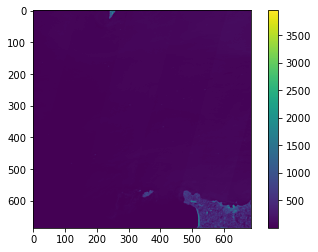

In [14]:
## https://automating-gis-processes.github.io/CSC/notebooks/L5/read-cogs.html
%matplotlib inline
import rasterio
import matplotlib.pyplot as plt
with rasterio.open(file_url) as src:
    # List of overviews from biggest to smallest
    oviews = src.overviews(1)
    # Retrieve the smallest thumbnail
    oview = oviews[-1]
    # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
    thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))
plt.imshow(thumbnail)
plt.colorbar()


For the qgis code please see the script https://github.com/acgeospatial/Satellite_Imagery_Python/blob/master/cloud_native/STAC_QGIS.py 